In [1]:
import numpy as np
import torch
from sklearn.datasets import fetch_california_housing
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from typing import Any

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
california_housing = fetch_california_housing(as_frame=True).frame
california_housing

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [4]:
data = (
    california_housing
    .assign(split=lambda df: np.random.RandomState(42).choice(["train", "test"], p=[.8, .2], size=df.shape[0]))
)
data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  split  
0        -122.23        4.526  train  
1        -122.22        3.585   test  
2        -122.24        3.521  train  
3        -122.25        3.413  train  
4        -122.25        3.422  train  
...          ...          ...    ...  
20635    -121.09        0.781  train  
20636    -121.21        0.771   test  
20637    -121.22        0.923  train  
20638    -121.32        0.847   test  
20639    -121.24        0.894  train  

[20640 rows x 10 columns]

In [5]:
input_columns = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]
target_col = "MedHouseVal"
interesting_input_col = "MedInc"
interesting_input_col_index = 0

In [6]:
X_train_orig_numpy = data[data["split"] == "train"][input_columns].to_numpy()
y_train_orig_numpy = data[data["split"] == "train"][target_col].to_numpy()

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_numpy = X_scaler.fit_transform(X_train_orig_numpy)
y_train_numpy = y_scaler.fit_transform(y_train_orig_numpy.reshape(-1, 1))

X_test_orig_numpy = data[data["split"] == "test"][input_columns].to_numpy()
y_test_orig_numpy = data[data["split"] == "test"][target_col].to_numpy()

X_test_numpy = X_scaler.transform(X_test_orig_numpy)
y_test_numpy = y_scaler.transform(y_test_orig_numpy.reshape(-1, 1))

X_train = torch.tensor(X_train_numpy, dtype=torch.float32, device=device)
y_train = torch.tensor(y_train_numpy.reshape(-1, 1), dtype=torch.float32, device=device)

X_test = torch.tensor(X_test_numpy, dtype=torch.float32, device=device)
y_test = torch.tensor(y_test_numpy.reshape(-1, 1), dtype=torch.float32, device=device)

print(f"""{X_scaler.mean_ = }, {X_scaler.scale_ = }""")
print(f"""{y_scaler.mean_ = }, {y_scaler.scale_ = }""")

print(f"""{X_train_orig_numpy.shape = }""")
print(f"""{y_train_orig_numpy.shape = }""")
print(f"""{X_test_orig_numpy.shape = }""")
print(f"""{y_test_orig_numpy.shape = }""")

print(f"""{X_train_numpy.shape = }""")
print(f"""{y_train_numpy.shape = }""")
print(f"""{X_test_numpy.shape = }""")
print(f"""{y_test_numpy.shape = }""")

print(f"""{X_train.shape = }""")
print(f"""{y_train.shape = }""")
print(f"""{X_test.shape = }""")
print(f"""{y_test.shape = }""")

X_scaler.mean_ = array([ 3.86379536e+00,  2.86023133e+01,  5.39985108e+00,  1.09169032e+00,
        1.42360946e+03,  3.07033814e+00,  3.56239072e+01, -1.19564896e+02]), X_scaler.scale_ = array([1.90417299e+00, 1.25688015e+01, 2.17143160e+00, 3.73109088e-01,
       1.12100856e+03, 1.06300729e+01, 2.12609783e+00, 1.99821353e+00])
y_scaler.mean_ = array([2.06399181]), y_scaler.scale_ = array([1.15328625])
X_train_orig_numpy.shape = (16513, 8)
y_train_orig_numpy.shape = (16513,)
X_test_orig_numpy.shape = (4127, 8)
y_test_orig_numpy.shape = (4127,)
X_train_numpy.shape = (16513, 8)
y_train_numpy.shape = (16513, 1)
X_test_numpy.shape = (4127, 8)
y_test_numpy.shape = (4127, 1)
X_train.shape = torch.Size([16513, 8])
y_train.shape = torch.Size([16513, 1])
X_test.shape = torch.Size([4127, 8])
y_test.shape = torch.Size([4127, 1])


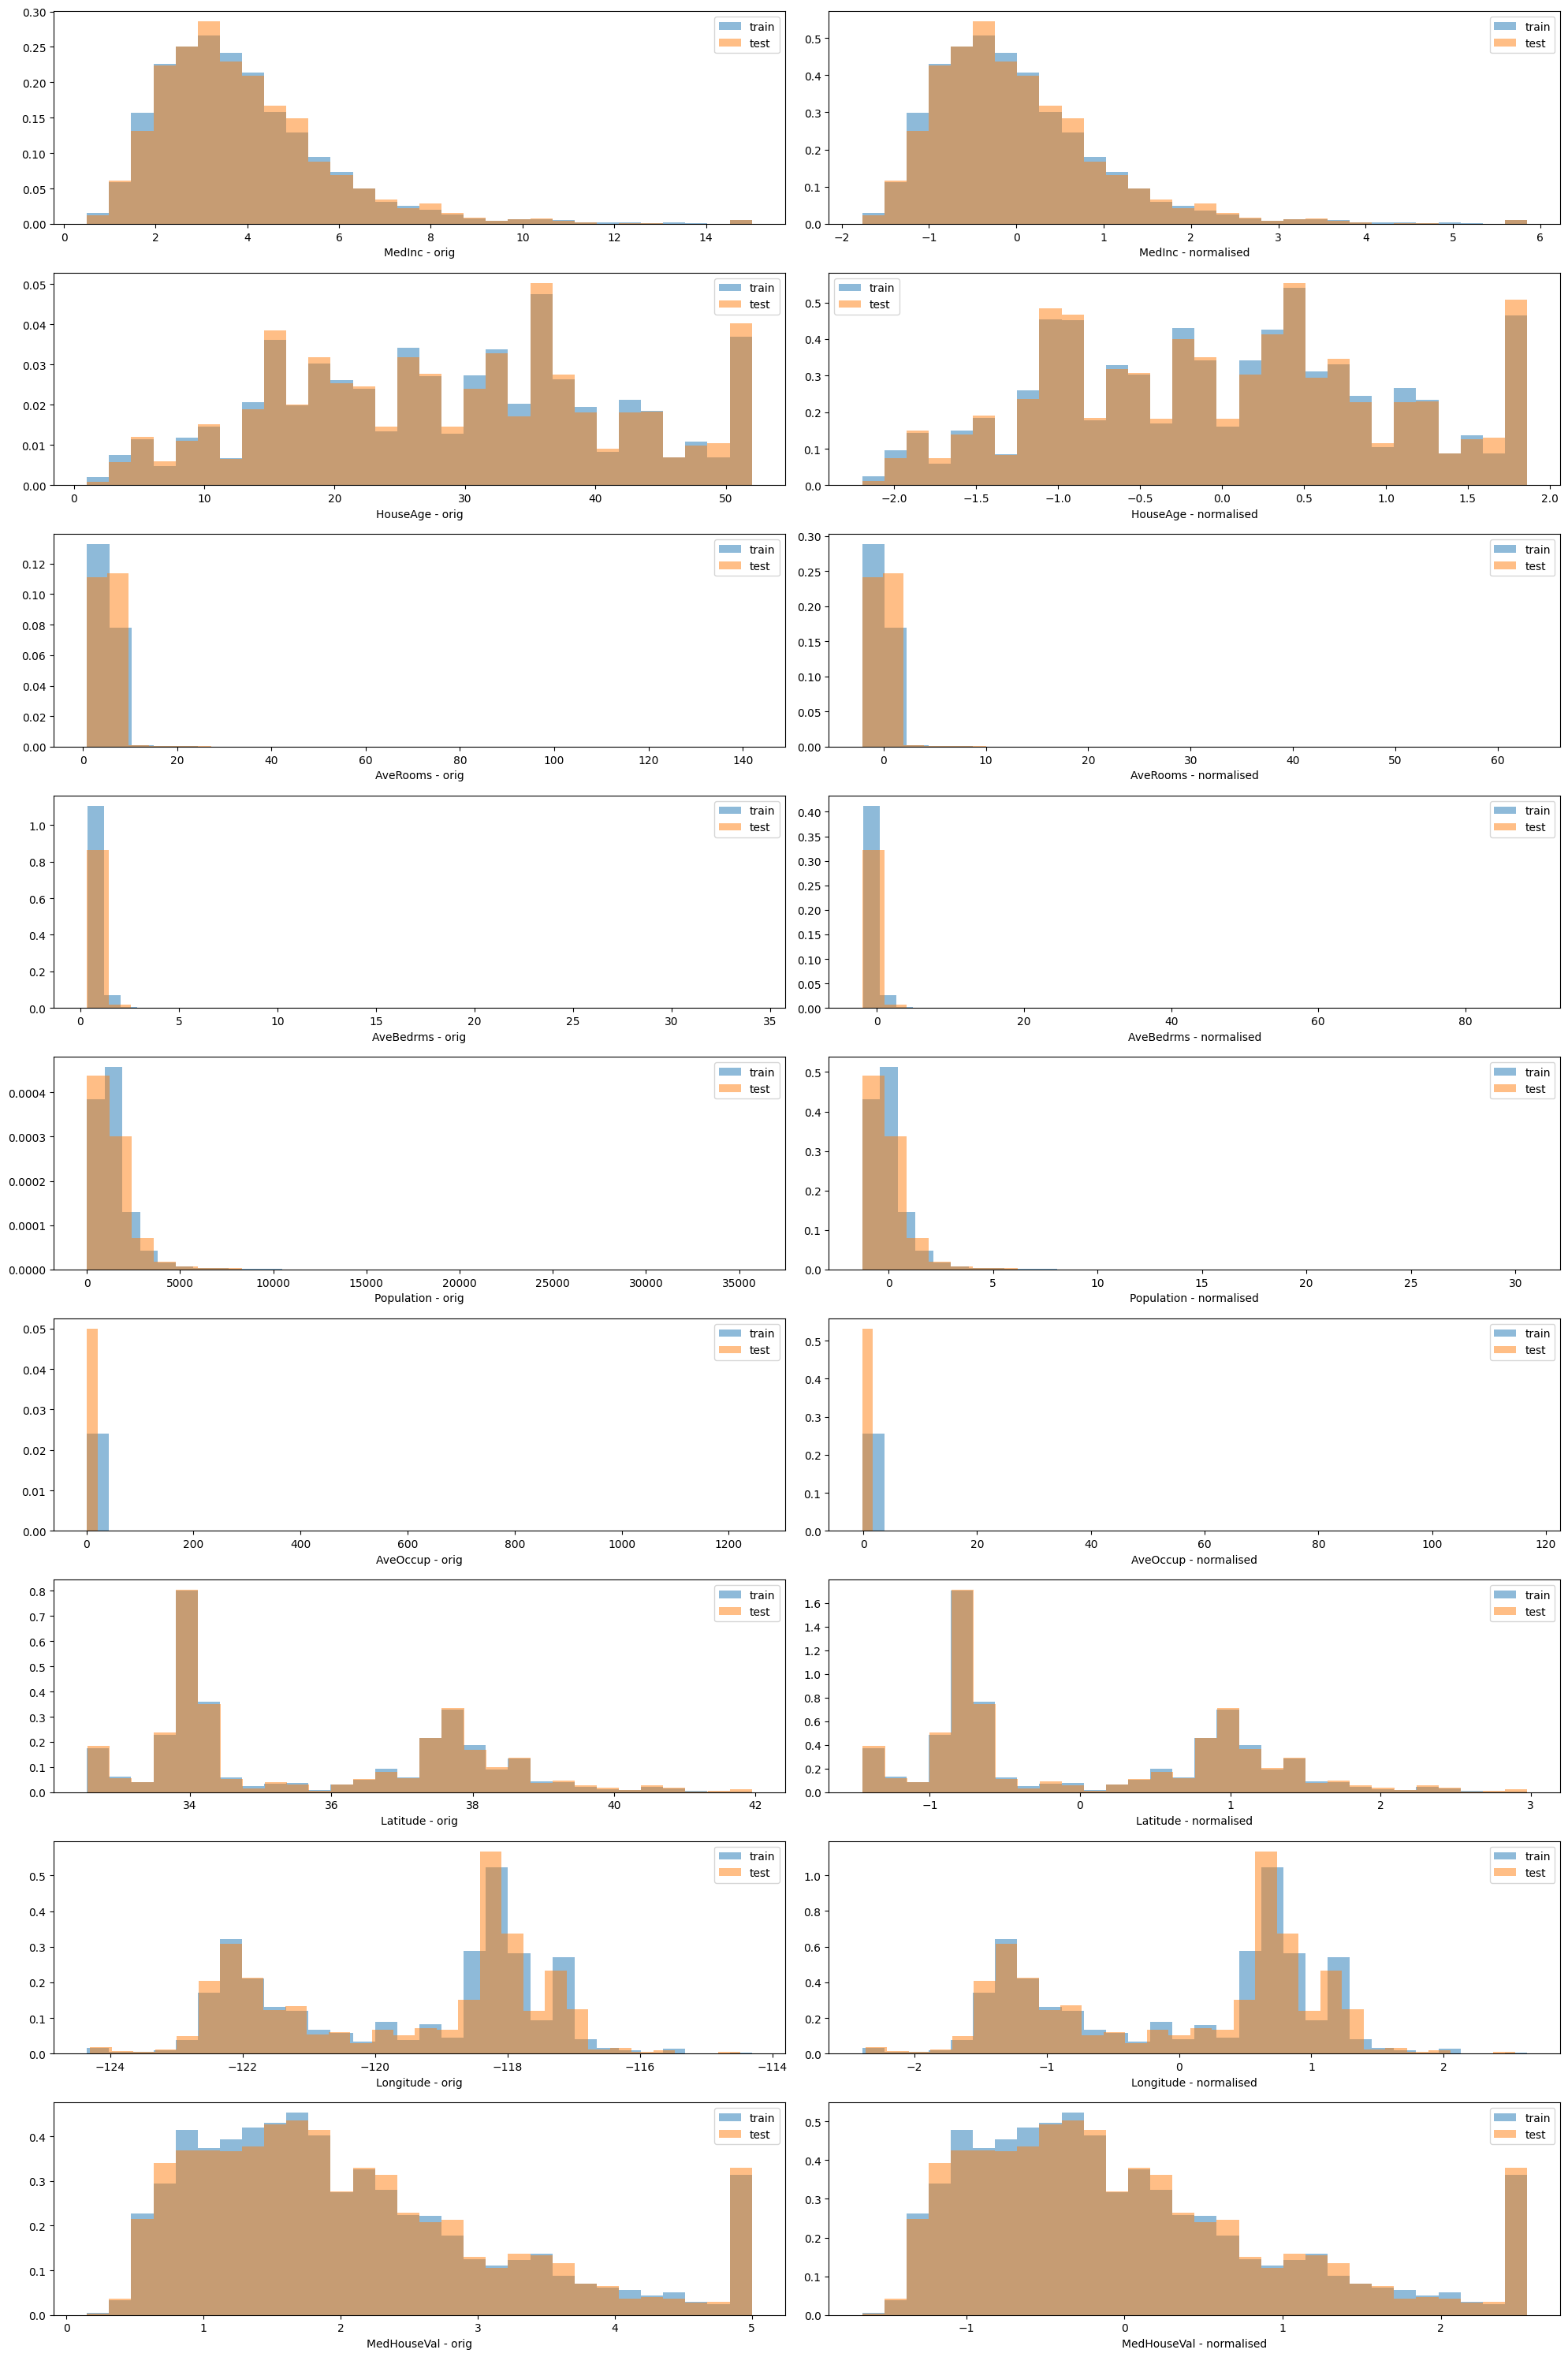

In [7]:
def viz_data():
    fig, axes = plt.subplots(nrows=len(input_columns) + 1, ncols=2, figsize=(20, 30))
    for i_col, col in enumerate(input_columns + [target_col]):
        orig_ax = axes[i_col, 0]
        if i_col == len(input_columns):
            vec_train = y_train_orig_numpy.ravel()
            vec_test = y_test_orig_numpy.ravel()

            vec_train_normalised = y_train_numpy.ravel()
            vec_test_normalised = y_test_numpy.ravel()
        else:
            vec_train = X_train_orig_numpy[:, i_col]
            vec_test = X_test_orig_numpy[:, i_col]

            vec_train_normalised = X_train_numpy[:, i_col]
            vec_test_normalised = X_test_numpy[:, i_col]

        orig_ax.hist(vec_train, bins=30, label="train", alpha=.5, density=True)
        orig_ax.hist(vec_test, bins=30, label="test", alpha=.5, density=True)

        orig_ax.set_xlabel(col + " - orig")
        orig_ax.legend()

        normalised_ax = axes[i_col, 1]
        normalised_ax.hist(vec_train_normalised, bins=30, label="train", alpha=.5, density=True)
        normalised_ax.hist(vec_test_normalised, bins=30, label="test", alpha=.5, density=True)

        normalised_ax.set_xlabel(col + " - normalised")
        normalised_ax.legend()
    
    fig.tight_layout()

viz_data()

In [8]:
class MCDropout(torch.nn.Module):
  def __init__(self, p: float) -> None:
    self.p = p
    super().__init__()

  def forward(self, input: torch.Tensor) -> torch.Tensor:
    return torch.nn.functional.dropout(input, p=self.p, training=True)

In [9]:
def create_net(net_description: dict[str, Any]) -> torch.nn.Module:
    def get_activation():
        act = net_description.get("activation", "gelu")
        if act == "gelu":
            return torch.nn.GELU()
        raise NotImplementedError(f"Unknown activation: {act}.")

    def get_dropout() -> list[torch.nn.Module]:
        dropout_p = net_description.get("dropout_p", .5)
        dropout_type = net_description.get("dropout_type", .5)

        if dropout_type == "regular":
            return [torch.nn.Dropout(p=dropout_p)]
    
        if dropout_type == "monte_carlo":
            return [MCDropout(p=dropout_p)]
        
        if dropout_type == "None":
            return []
    
        raise NotImplementedError(f"Unknown dropout: {dropout_type}.")

    num_hidden_neurons = net_description.get("num_hidden_neurons", 100)

    return torch.nn.Sequential(
        torch.nn.Linear(in_features=len(input_columns), out_features=num_hidden_neurons, bias=True),
        get_activation(),
        # get_dropout(),
        torch.nn.Linear(in_features=num_hidden_neurons, out_features=num_hidden_neurons, bias=True),
        get_activation(),
        *get_dropout(),

        torch.nn.Linear(in_features=num_hidden_neurons, out_features=num_hidden_neurons, bias=True),
        get_activation(),
        *get_dropout(),
        torch.nn.Linear(in_features=num_hidden_neurons, out_features=num_hidden_neurons, bias=True),
        get_activation(),
        *get_dropout(),
        torch.nn.Linear(in_features=num_hidden_neurons, out_features=num_hidden_neurons, bias=True),
        get_activation(),
        *get_dropout(),
        torch.nn.Linear(in_features=num_hidden_neurons, out_features=num_hidden_neurons, bias=True),
        get_activation(),
        *get_dropout(),

        torch.nn.Linear(in_features=num_hidden_neurons, out_features=num_hidden_neurons, bias=True),
        get_activation(),
        *get_dropout(),
        torch.nn.Linear(in_features=num_hidden_neurons, out_features=1, bias=True),
        # get_activation(),
        # torch.nn.Sigmoid(),
        # torch.nn.Linear(in_features=1, out_features=1, bias=True),
    ).to(device=device)

In [10]:
def train_net(
    net_description: dict[str, Any],
    random_seed: int,
    num_epochs: int,
    batch_size: int,
    learning_rate: float,
    gamma: float,
    weight_decay: float = 1e-2,
    model_debug_data_save_frequency: int = 10
):
    torch.manual_seed(random_seed)
    net = create_net(net_description=net_description)
    optim = torch.optim.AdamW(params=net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optim, gamma=gamma)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    metrics = []

    for i_epoch in range(num_epochs):
        model_debug_data = None
        verbose = i_epoch % 50 == 0
        net.train()
        train_losses = []
        for batch_index, (input, target) in enumerate(train_loader):
            net.zero_grad()
            output = net.forward(input)
            loss = torch.nn.functional.mse_loss(output, target)

            loss.backward()

            optim.step()
            if batch_index == 0 and i_epoch % model_debug_data_save_frequency == 0:
                model_debug_data = {
                    "gradients": {
                        name: param.grad.detach().cpu().numpy()
                        for name, param in net.named_parameters()
                    },
                    "weights": {
                        name: param.detach().cpu().numpy()
                        for name, param in net.named_parameters()
                    }
                }

            train_losses.append(loss.item())

        current_learning_rate = optim.param_groups[0]["lr"]

        scheduler.step()

        train_loss = np.array(train_losses).mean()

        if verbose:
            print(f"[Epoch: {i_epoch}] Train loss: {train_loss}")

        net.eval()
        with torch.no_grad():
            test_losses = []
            for input, target in test_loader:
                output = net.forward(input)
                loss = torch.nn.functional.mse_loss(output, target)

                test_losses.append(loss.item())

            test_loss = np.array(test_losses).mean()
            if verbose:
                print(f"[Epoch: {i_epoch}] Test loss: {test_loss}")

        metrics.append(
            {
                "epoch": i_epoch,
                "train_loss": train_loss,
                "test_loss": test_loss,
                "model_debug_data": model_debug_data,
                "current_learning_rate": current_learning_rate
            }
        )
    return {
        "metrics": pd.DataFrame(metrics),
        "net": net,
    }

In [11]:
def viz_training(training_bundle, num_pred: int = 1):
    net: torch.nn.Module = training_bundle["net"]
    metrics_df: pd.DataFrame = training_bundle["metrics"]

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))

    loss_ax, pred_vs_true_ax, gradient_ax, weight_ax, error_train_ax, error_test_ax = axes.ravel()

    loss_ax.plot(metrics_df["epoch"], metrics_df["train_loss"], label="train_loss")
    loss_ax.plot(metrics_df["epoch"], metrics_df["test_loss"], label="test_loss")
    loss_ax.set_xlabel("Epoch")
    loss_ax.set_ylabel("Loss")
    loss_ax.legend()

    pred_vs_true_ax.scatter(X_train_numpy[:, interesting_input_col_index], y_train_numpy, label="train true", alpha=.1)
    pred_vs_true_ax.scatter(X_test_numpy[:, interesting_input_col_index], y_test_numpy, label="test true", alpha=.1)
    net.eval()
    with torch.no_grad():
        preds_train_x = []
        preds_train_y = []
        preds_test_x = []
        preds_test_y = []
        for i_pred in range(num_pred):
            preds_train_x.append(X_train_numpy[:, interesting_input_col_index])
            preds_train_y_new = net.forward(X_train).cpu().numpy().ravel()
            preds_train_y.append(preds_train_y_new)

            preds_test_x.append(X_test_numpy[:, interesting_input_col_index])
            preds_test_y_new = net.forward(X_test).cpu().numpy().ravel()
            preds_test_y.append(preds_test_y_new)

            error_train_ax.scatter(y_train_numpy, preds_train_y_new, label=f"#pred={i_pred}", alpha=.1)
            error_test_ax.scatter(y_test_numpy, preds_test_y_new, label=f"#pred={i_pred}", alpha=.1)
        
        pred_vs_true_ax.scatter(np.concatenate(preds_train_x), np.concatenate(preds_train_y), label="train pred", alpha=.5)
        pred_vs_true_ax.scatter(np.concatenate(preds_test_x), np.concatenate(preds_test_y), label="test pred", alpha=.5)


    for source, ax in zip(["gradients", "weights"], [gradient_ax, weight_ax]): 
        gradient_df = (
            training_bundle["metrics"]
            .loc[lambda df: df["model_debug_data"].notna()]
            .assign(
                temp=lambda df: [
                    {"epoch": epoch} | model_debug_data[source]
                    for epoch, model_debug_data
                    in zip(df["epoch"], df["model_debug_data"])
                ]
            )
            ["temp"].apply(pd.Series)
            .set_index("epoch")
            .assign(
                **{
                    colname: (
                        lambda df, colname=colname: [
                            np.power(vec.ravel(), 2.).mean()
                            for vec in df[colname]
                        ]
                    )
                    for colname in list(training_bundle["metrics"]["model_debug_data"].iloc[0][source].keys())
                }
            )
        )
        for col in gradient_df.columns:
            ax.plot(gradient_df.index.to_numpy(), gradient_df[col].to_numpy(), label=col)
        
        ax.set_title(source)
        ax.legend()
    
    
    pred_vs_true_ax.legend()
    pred_vs_true_ax.set_xlabel(interesting_input_col)
    pred_vs_true_ax.set_ylabel(target_col)
    error_train_ax.set_title(f"{target_col} - true vs pred - train")
    error_train_ax.set_xlabel(f"{target_col} - true")
    error_train_ax.set_ylabel(f"{target_col} - pred")
    error_train_ax.legend()
    error_test_ax.set_title(f"{target_col} - true vs pred - test")
    error_test_ax.set_xlabel(f"{target_col} - true")
    error_test_ax.set_ylabel(f"{target_col} - pred")
    error_test_ax.legend()

[Epoch: 0] Train loss: 0.9962907678940717
[Epoch: 0] Test loss: 0.8286997437477112


[Epoch: 50] Train loss: 0.26116324961185455
[Epoch: 50] Test loss: 0.23995856046676636
[Epoch: 100] Train loss: 0.23288649495910196
[Epoch: 100] Test loss: 0.2167921245098114
[Epoch: 150] Train loss: 0.22143032883896546
[Epoch: 150] Test loss: 0.2165607839822769
[Epoch: 200] Train loss: 0.2141870347892537
[Epoch: 200] Test loss: 0.21038092970848082
[Epoch: 250] Train loss: 0.20537600622457616
[Epoch: 250] Test loss: 0.20987790822982788


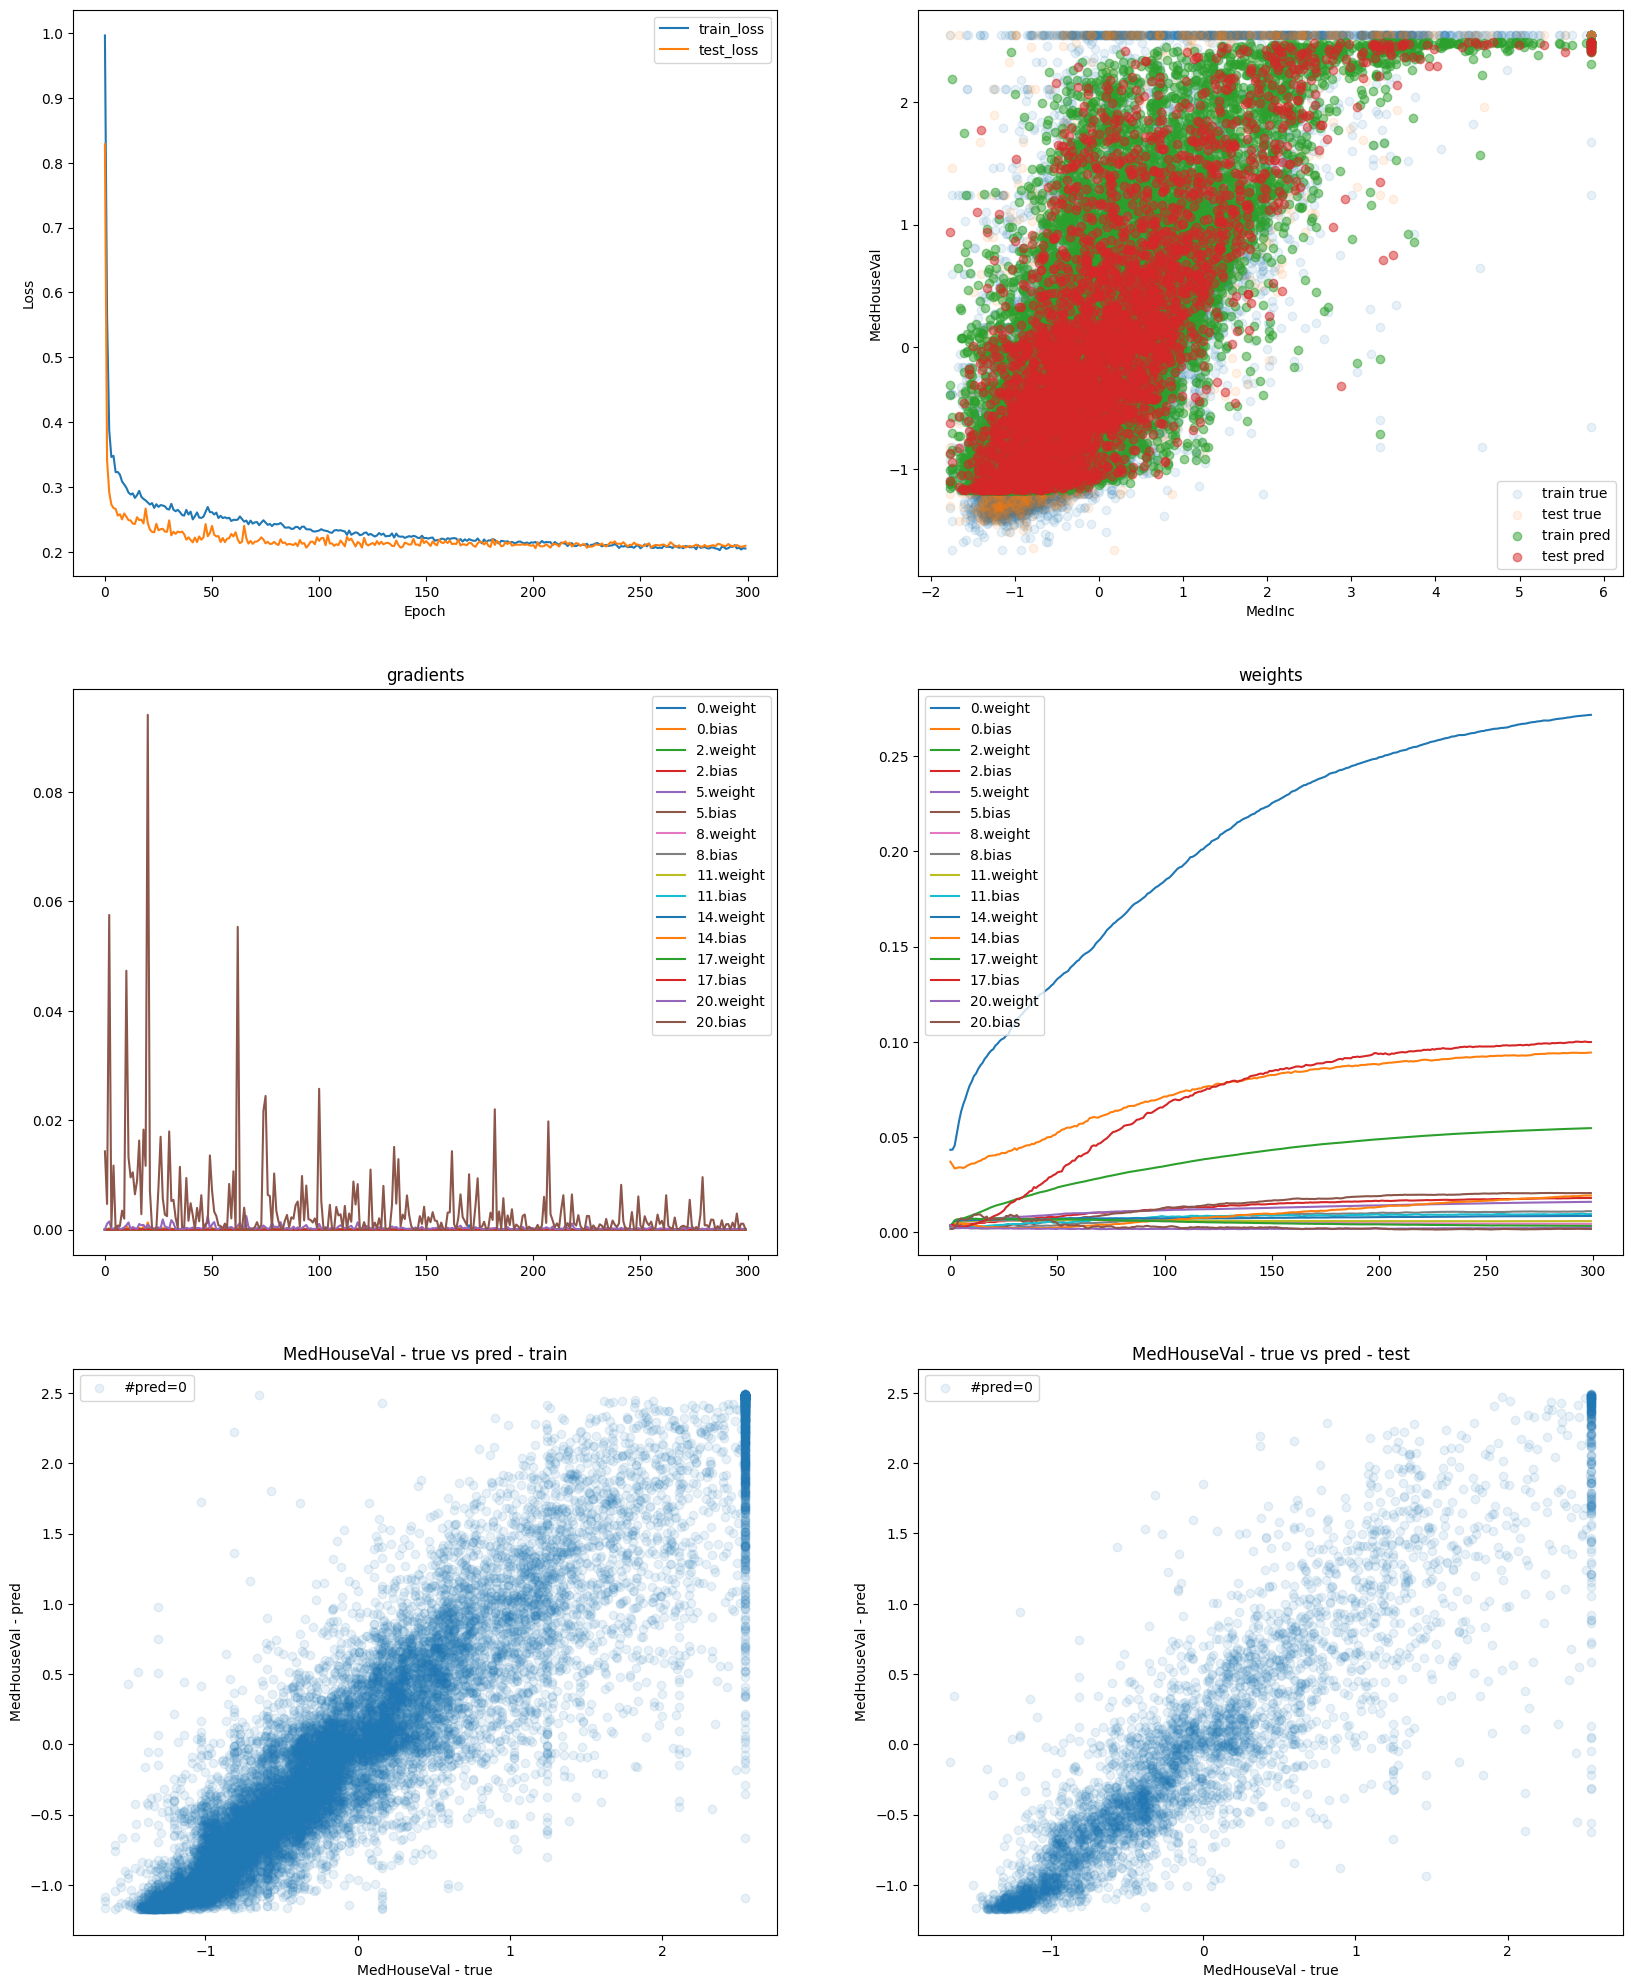

In [12]:
training_bundle_default = train_net(
    net_description={"activation": "gelu", "dropout_p": .5, "dropout_type": "regular"},
    random_seed=42,
    num_epochs=300,
    batch_size=1000,
    learning_rate=1e-2,
    gamma=.99,
    model_debug_data_save_frequency=1,
)
viz_training(training_bundle=training_bundle_default)

[Epoch: 0] Train loss: 0.7079383169903475
[Epoch: 0] Test loss: 0.38035297989845274


[Epoch: 50] Train loss: 0.26228198409080505
[Epoch: 50] Test loss: 0.22421931624412536
[Epoch: 100] Train loss: 0.2311194468947018
[Epoch: 100] Test loss: 0.2173749566078186
[Epoch: 150] Train loss: 0.21883313533137827
[Epoch: 150] Test loss: 0.20471104681491853
[Epoch: 200] Train loss: 0.20967760857413797
[Epoch: 200] Test loss: 0.20303523242473603
[Epoch: 250] Train loss: 0.20530552811482372
[Epoch: 250] Test loss: 0.20379097163677215


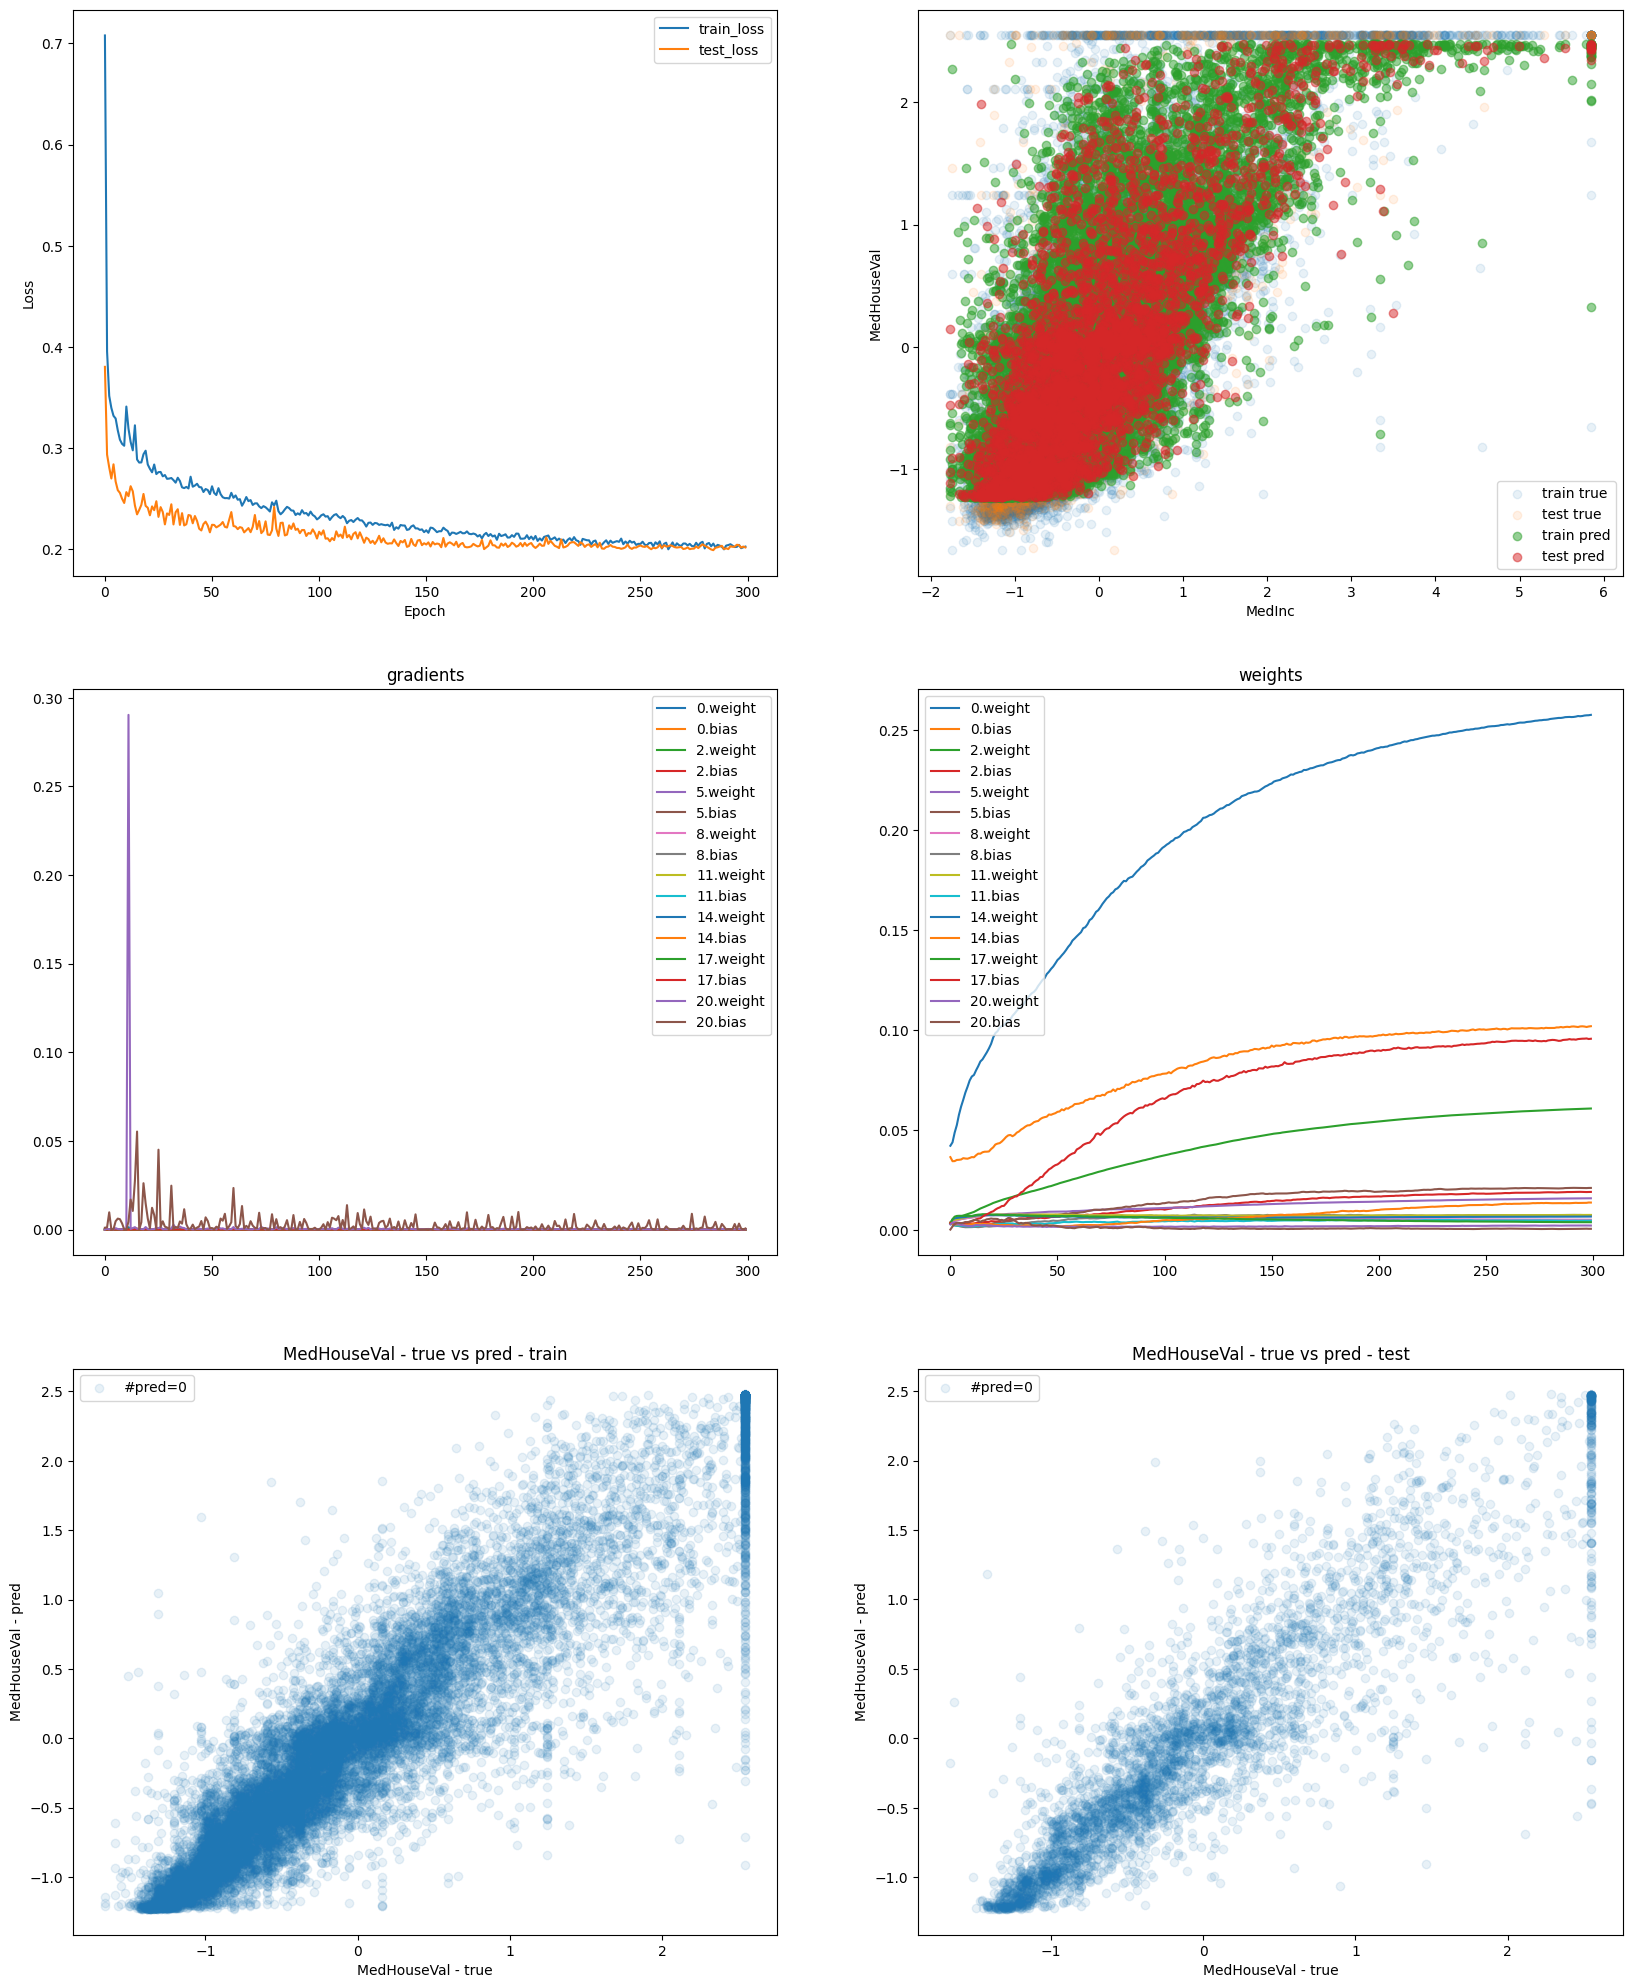

In [13]:
training_bundle_other_seed = train_net(
    net_description={"activation": "gelu", "dropout_p": .5, "dropout_type": "regular"},
    random_seed=43,
    num_epochs=300,
    batch_size=1000,
    learning_rate=1e-2,
    gamma=.99,
    model_debug_data_save_frequency=1,
)
viz_training(training_bundle=training_bundle_other_seed)

[Epoch: 0] Train loss: 0.6070364608484156
[Epoch: 0] Test loss: 0.3518918097019196


[Epoch: 50] Train loss: 0.15884841803242178
[Epoch: 50] Test loss: 0.21105629205703735
[Epoch: 100] Train loss: 0.08095814331489451
[Epoch: 100] Test loss: 0.23030907809734344
[Epoch: 150] Train loss: 0.036907472373808134
[Epoch: 150] Test loss: 0.2484299898147583
[Epoch: 200] Train loss: 0.015627940514070147
[Epoch: 200] Test loss: 0.27223686277866366
[Epoch: 250] Train loss: 0.008324970655581531
[Epoch: 250] Test loss: 0.28993680477142336


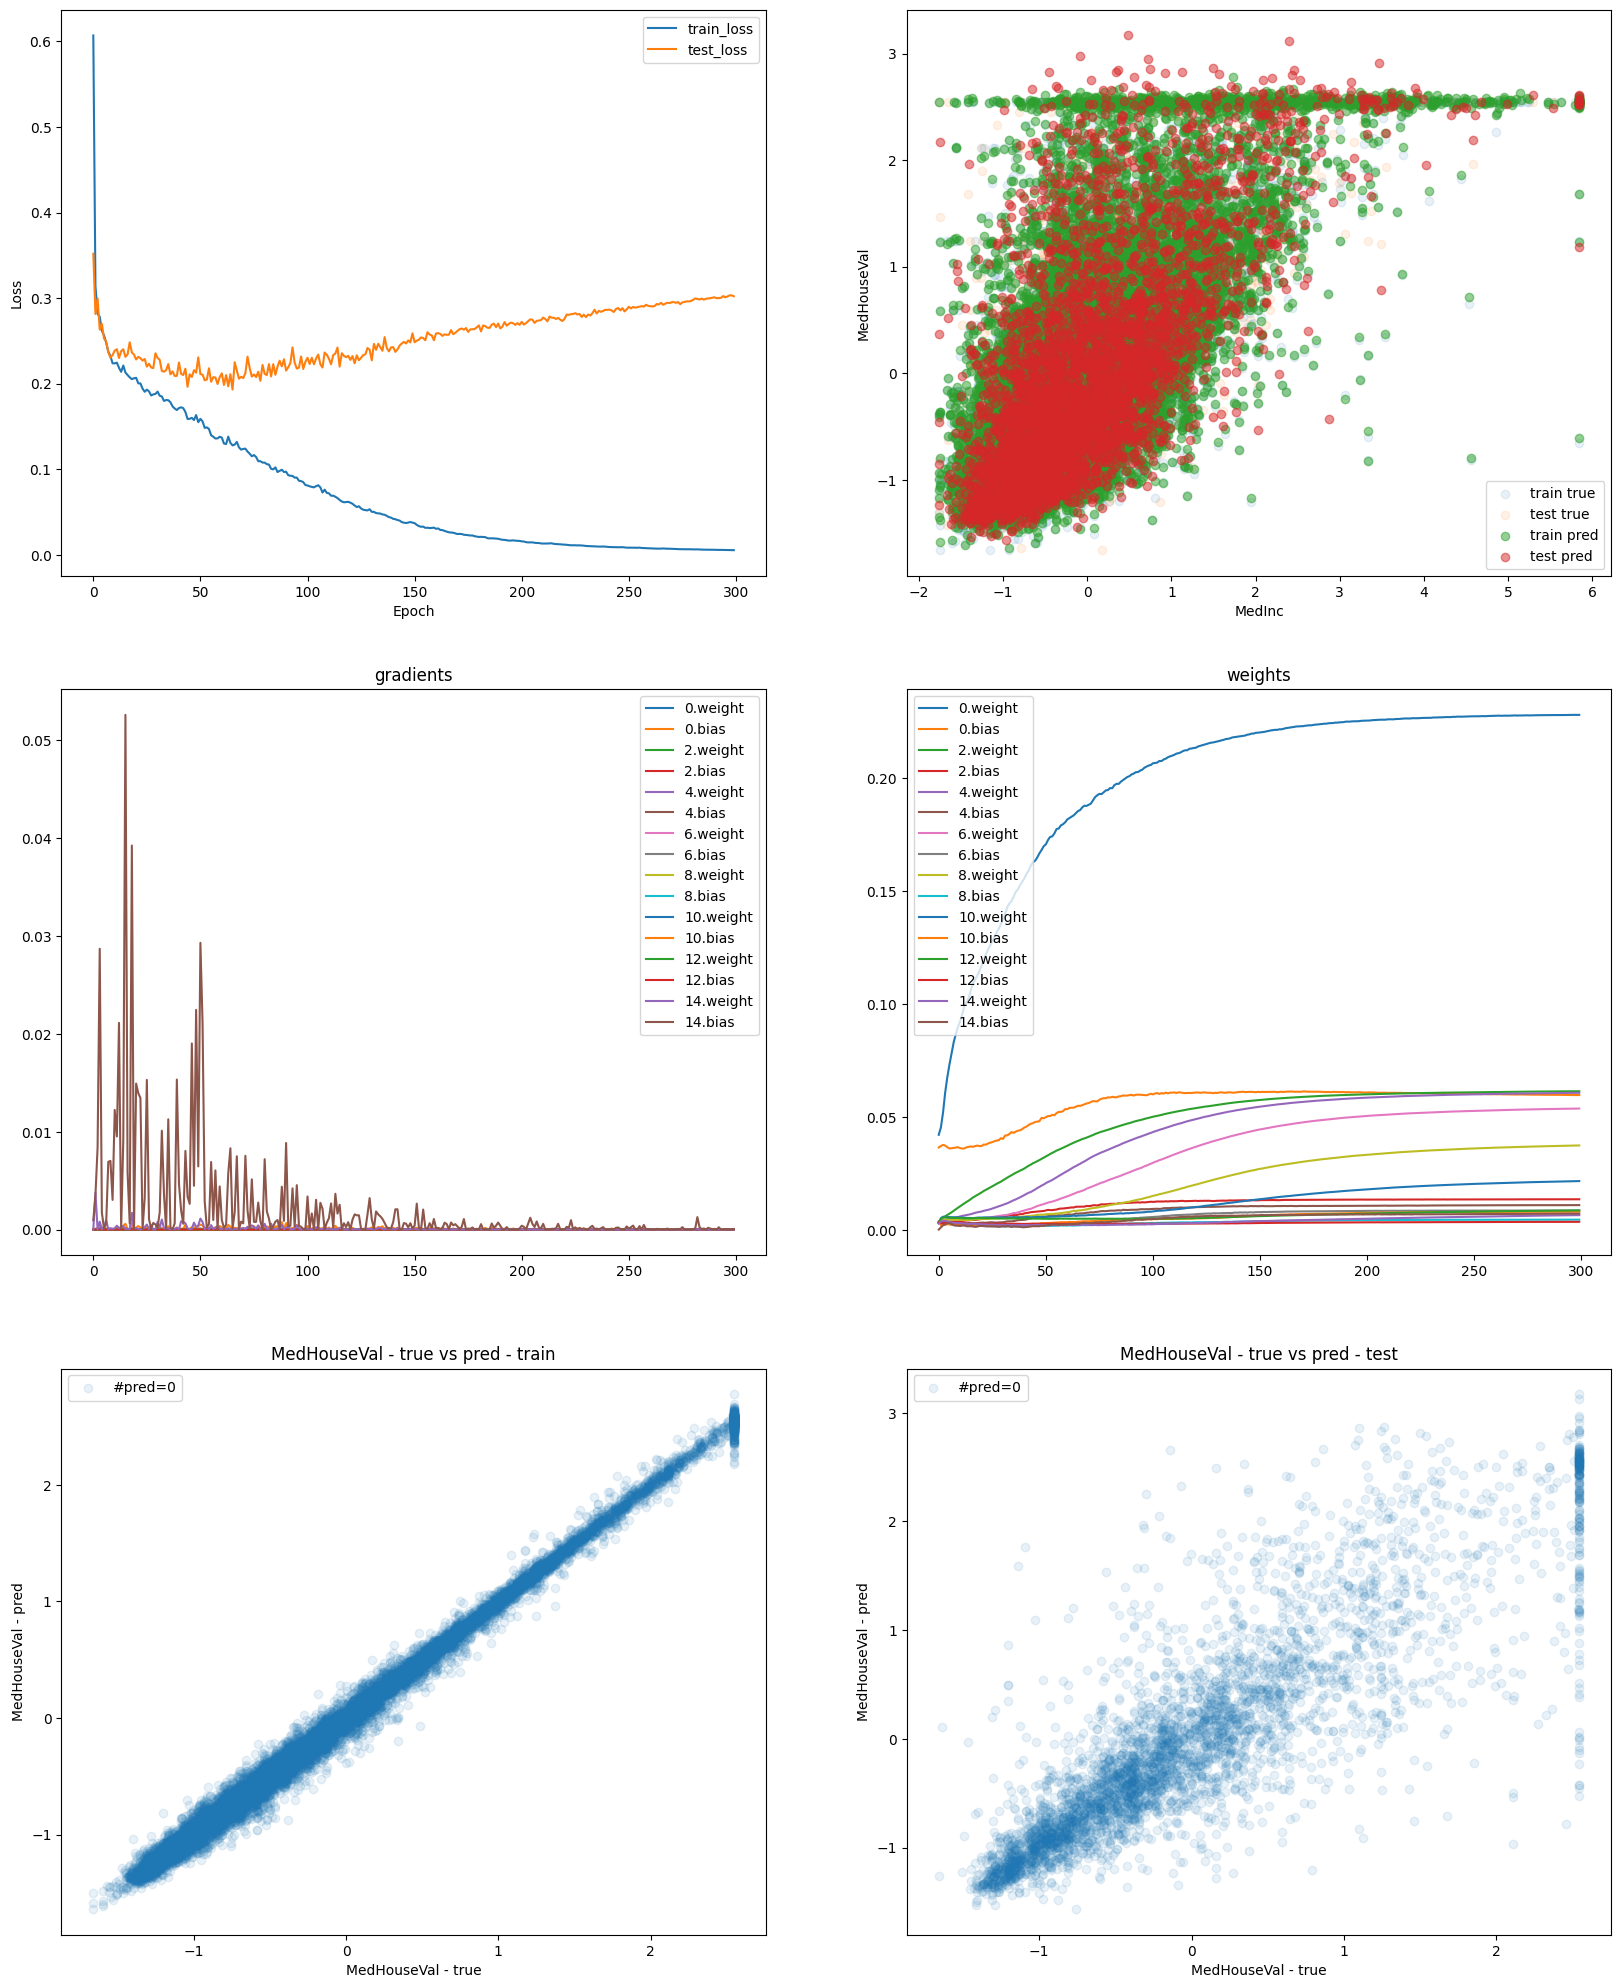

In [14]:
training_bundle_no_dropout = train_net(
    net_description={"activation": "gelu", "dropout_type": "None"},
    random_seed=43,
    num_epochs=300,
    batch_size=1000,
    learning_rate=1e-2,
    gamma=.99,
    model_debug_data_save_frequency=1,
)
viz_training(training_bundle=training_bundle_no_dropout)

[Epoch: 0] Train loss: 0.6074037744718439
[Epoch: 0] Test loss: 0.35217260718345644
[Epoch: 50] Train loss: 0.15473239737398484
[Epoch: 50] Test loss: 0.21014292538166046
[Epoch: 100] Train loss: 0.07189725777682136
[Epoch: 100] Test loss: 0.2274250268936157
[Epoch: 150] Train loss: 0.027430763468146324
[Epoch: 150] Test loss: 0.2605018675327301
[Epoch: 200] Train loss: 0.011704915148370406
[Epoch: 200] Test loss: 0.292257285118103
[Epoch: 250] Train loss: 0.006083073012311669
[Epoch: 250] Test loss: 0.30354890525341033


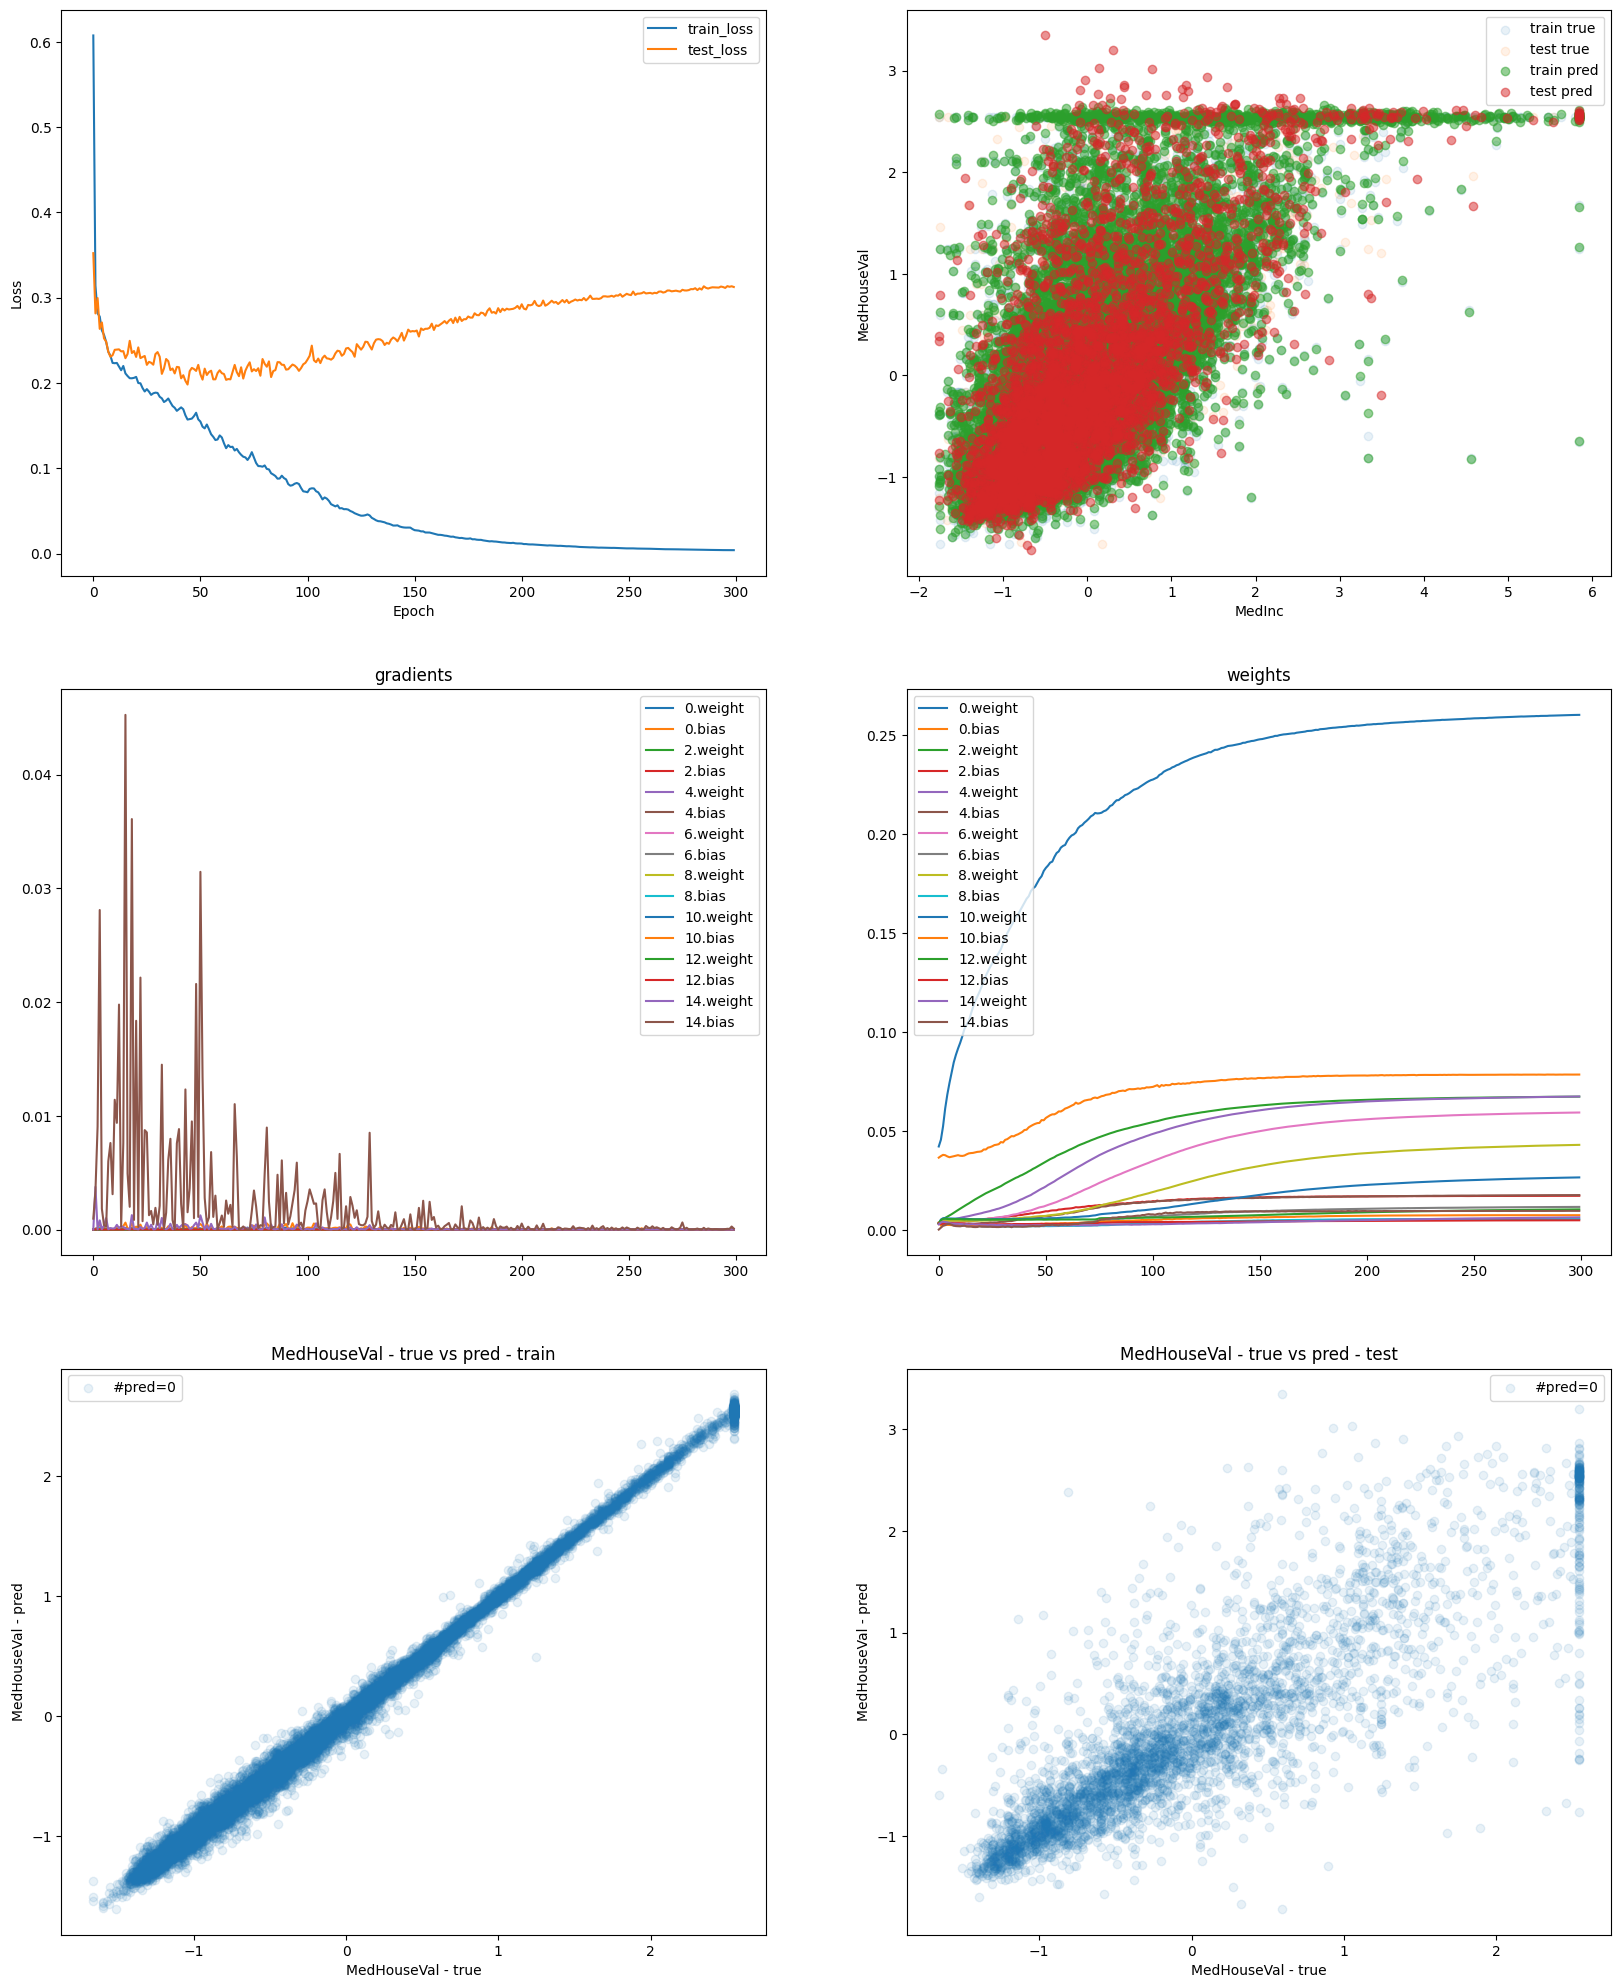

In [15]:
training_bundle_no_dropout_no_weight_decay = train_net(
    net_description={"activation": "gelu", "dropout_type": "None"},
    random_seed=43,
    num_epochs=300,
    batch_size=1000,
    learning_rate=1e-2,
    gamma=.99,
    weight_decay=1e-10,
    model_debug_data_save_frequency=1,
)
viz_training(training_bundle=training_bundle_no_dropout_no_weight_decay)

[Epoch: 0] Train loss: 0.9962907678940717
[Epoch: 0] Test loss: 0.8391781926155091


[Epoch: 50] Train loss: 0.25867793665212746
[Epoch: 50] Test loss: 0.2644129067659378
[Epoch: 100] Train loss: 0.23359628722948186
[Epoch: 100] Test loss: 0.2540291905403137
[Epoch: 150] Train loss: 0.21994558327338276
[Epoch: 150] Test loss: 0.2507598578929901
[Epoch: 200] Train loss: 0.2125171431723763
[Epoch: 200] Test loss: 0.25302254855632783
[Epoch: 250] Train loss: 0.20911155991694508
[Epoch: 250] Test loss: 0.24601577520370482


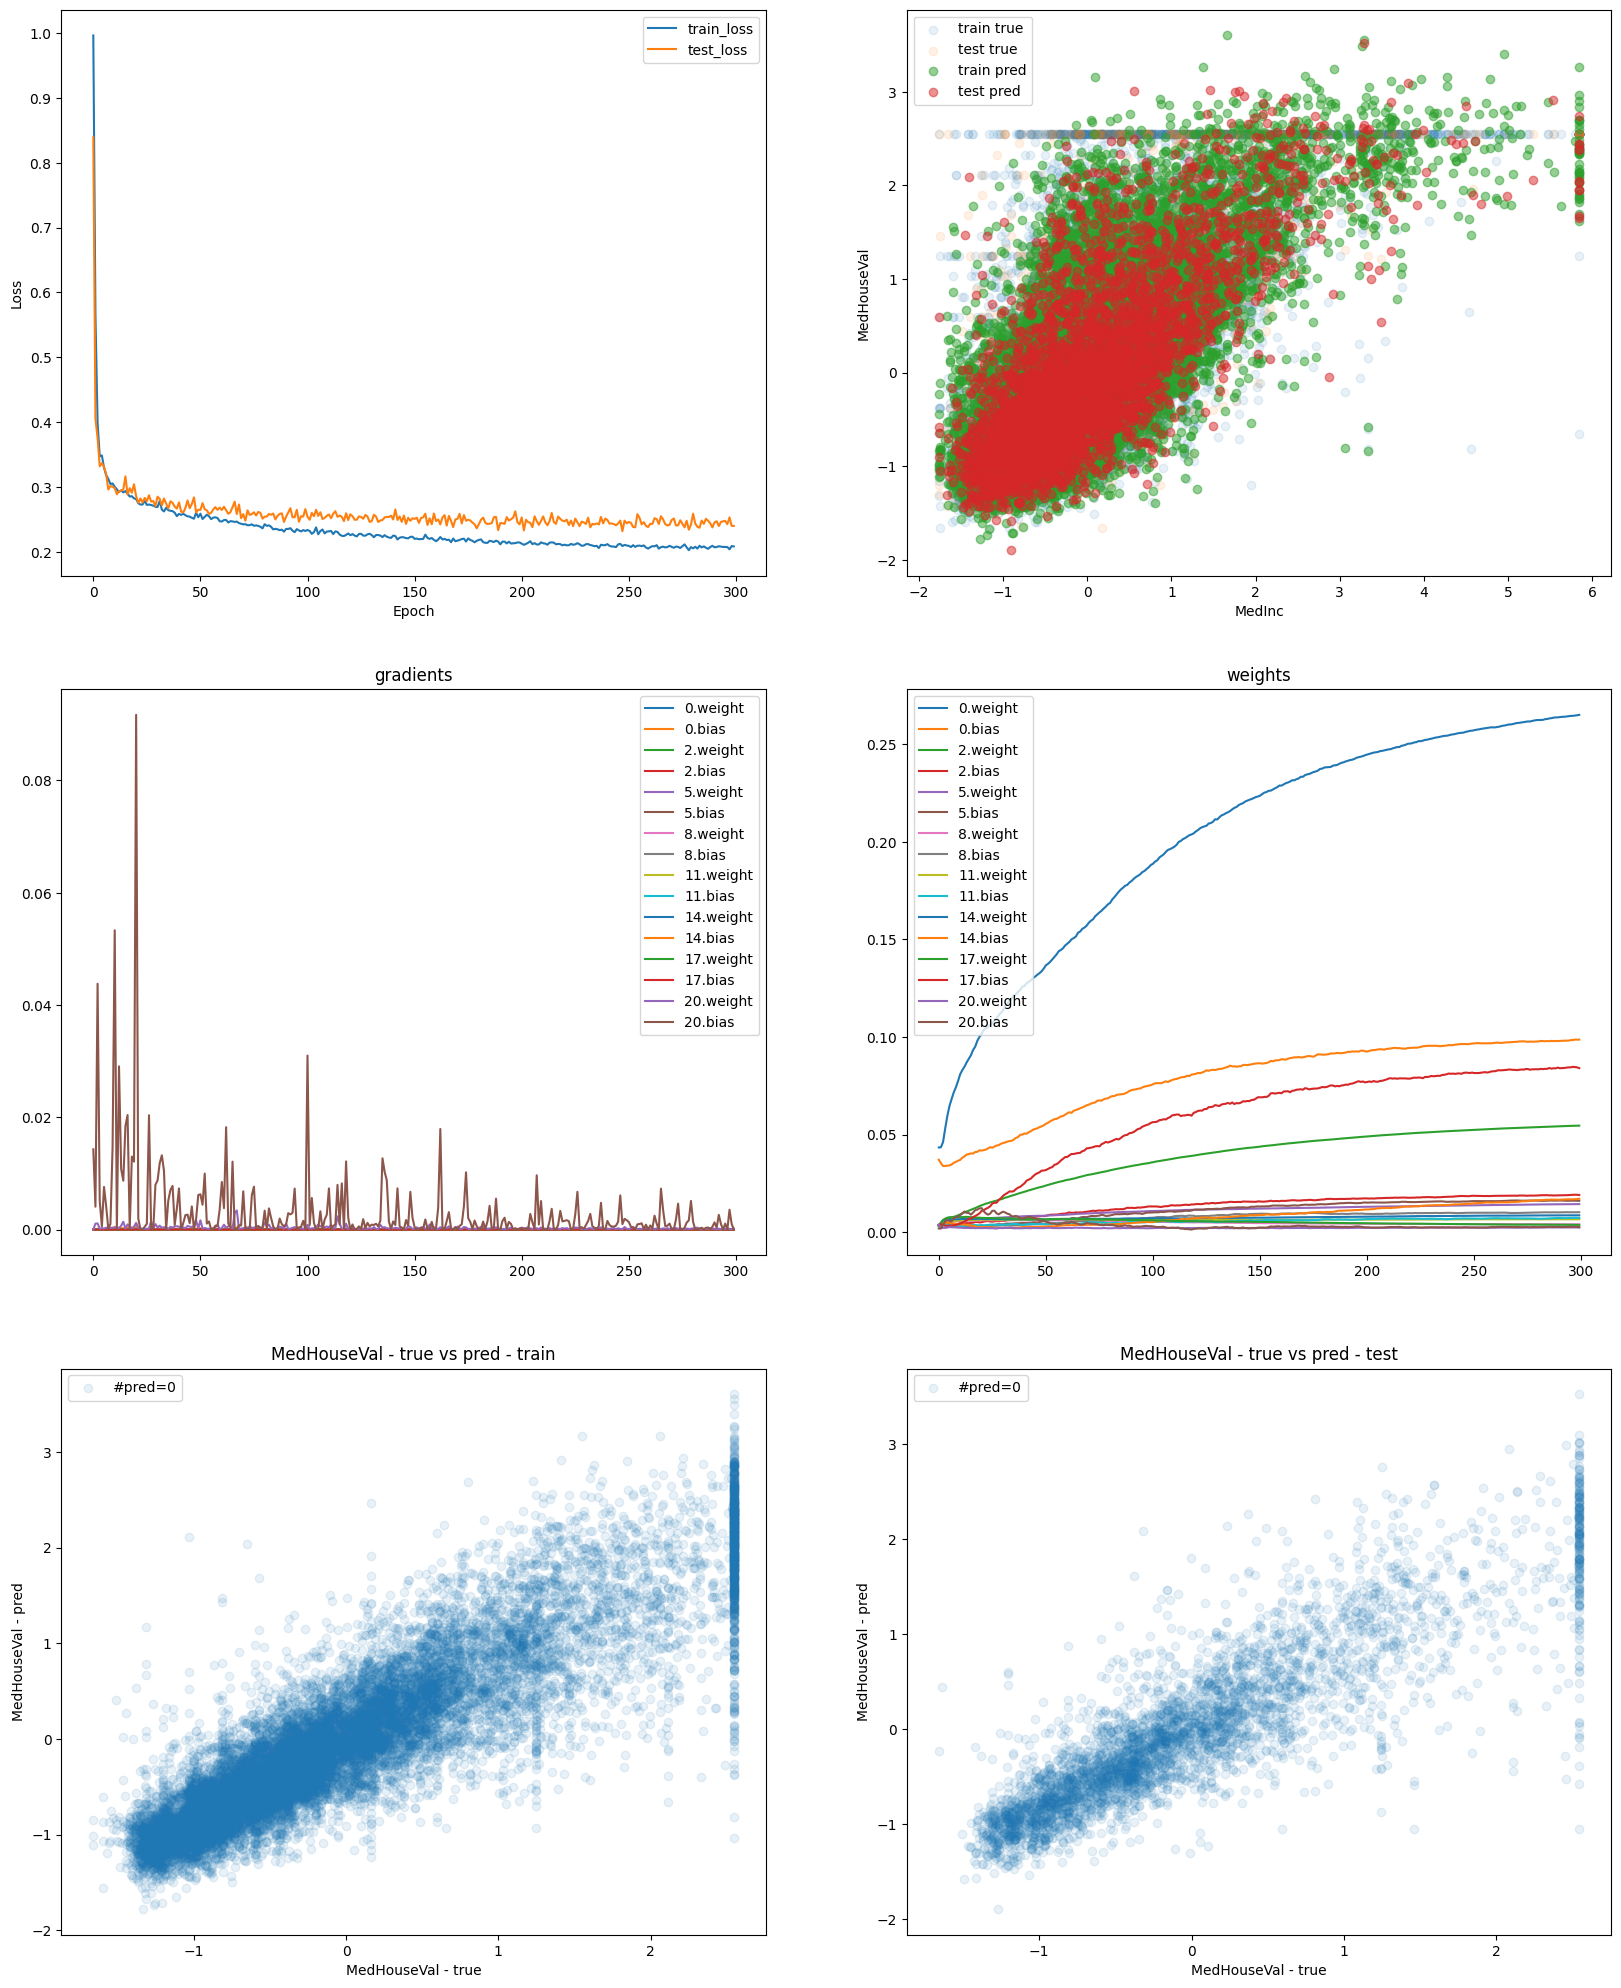

In [16]:
training_bundle_mc = train_net(
    net_description={"activation": "gelu", "dropout_p": .5, "dropout_type": "monte_carlo"},
    random_seed=42,
    num_epochs=300,
    batch_size=1000,
    learning_rate=1e-2,
    gamma=.99,
    model_debug_data_save_frequency=1,
)
viz_training(training_bundle=training_bundle_mc)

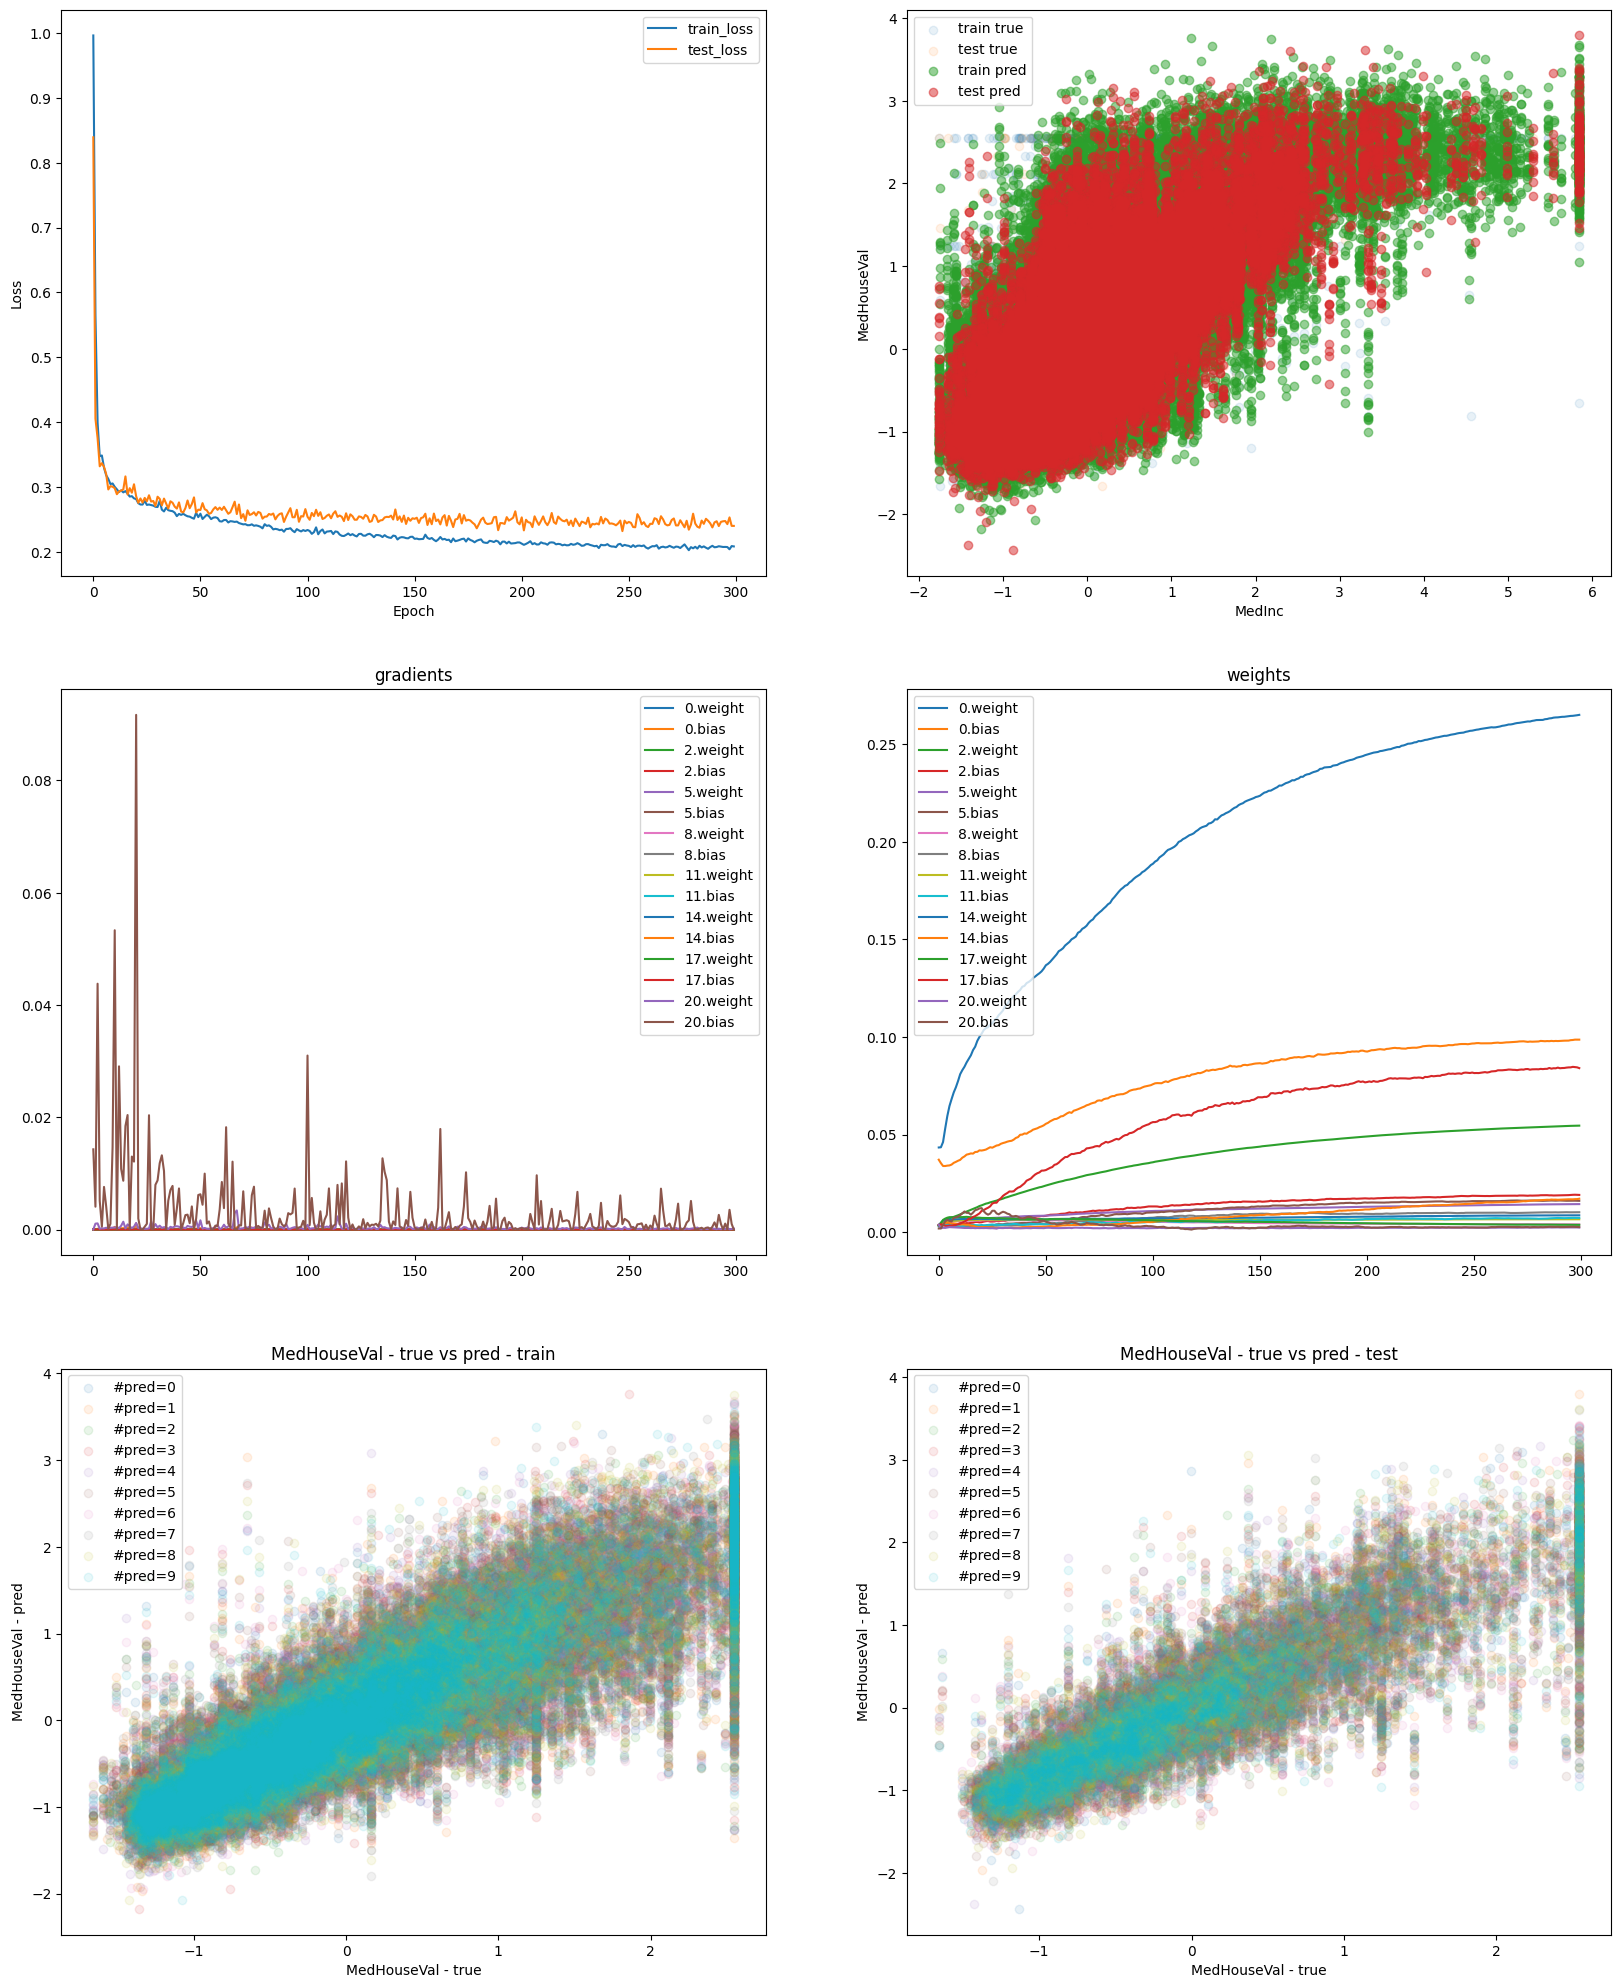

In [17]:
viz_training(training_bundle=training_bundle_mc, num_pred=10)

[Epoch: 0] Train loss: 0.7079383169903475
[Epoch: 0] Test loss: 0.4381032228469849


[Epoch: 50] Train loss: 0.26655972442206216
[Epoch: 50] Test loss: 0.27788265943527224
[Epoch: 100] Train loss: 0.23426413974341223
[Epoch: 100] Test loss: 0.2600666731595993
[Epoch: 150] Train loss: 0.22043947875499725
[Epoch: 150] Test loss: 0.23259792029857634
[Epoch: 200] Train loss: 0.20795628165497498
[Epoch: 200] Test loss: 0.24790666699409486
[Epoch: 250] Train loss: 0.2067490938831778
[Epoch: 250] Test loss: 0.23912968635559081


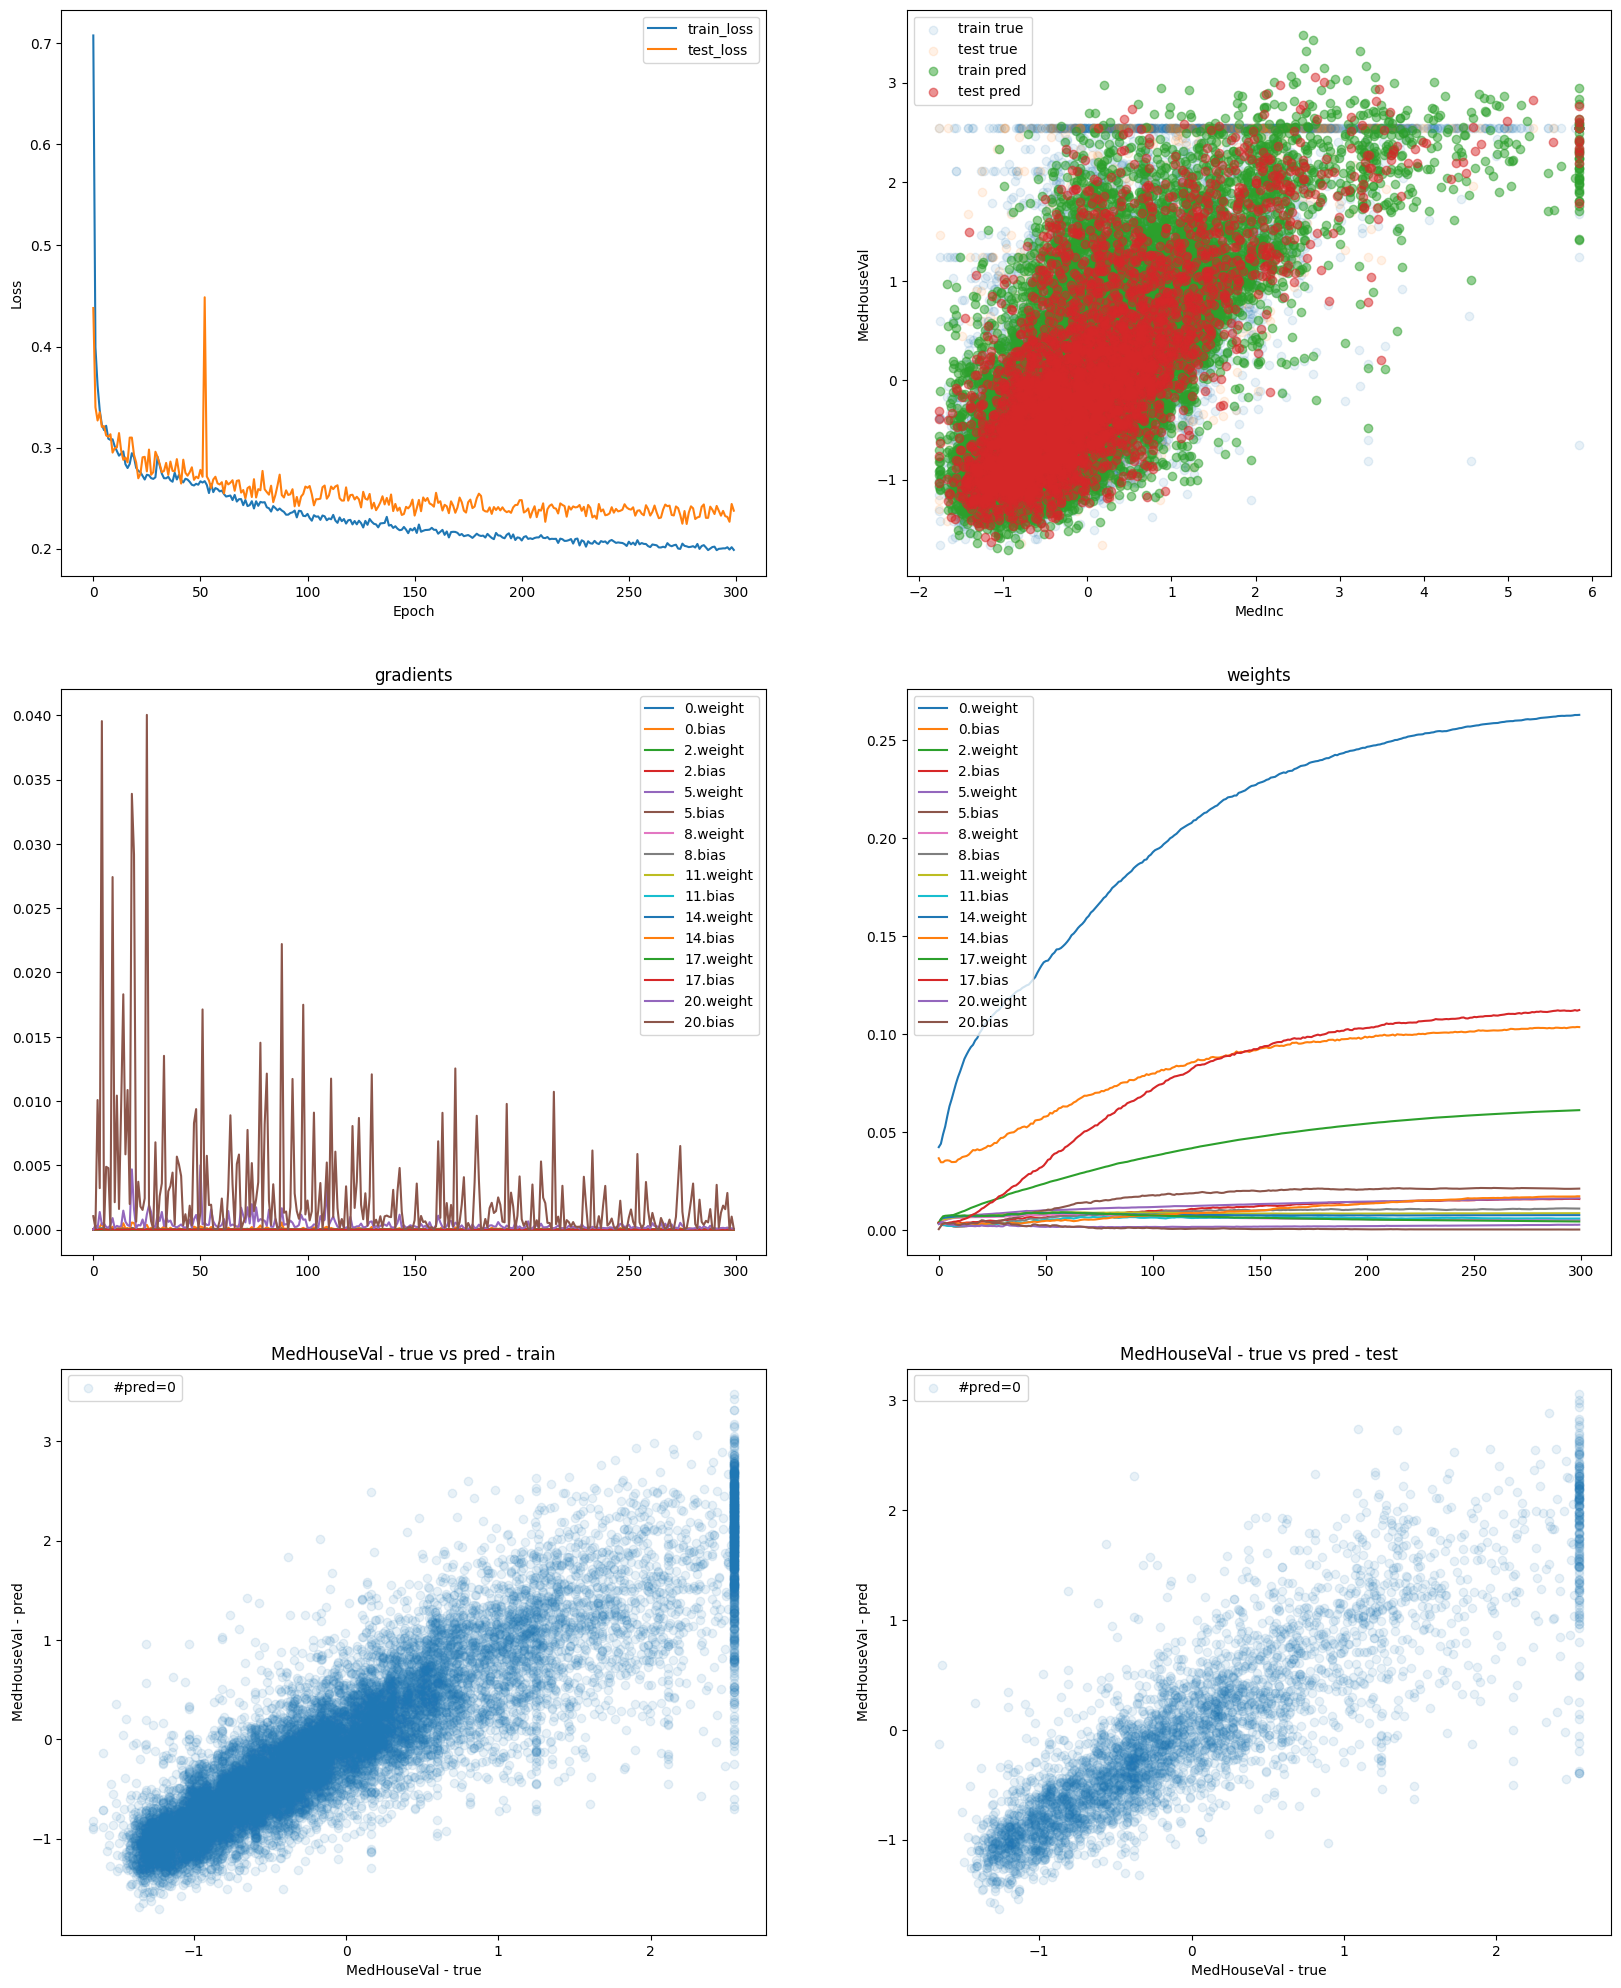

In [18]:
training_bundle_mc_other_seed = train_net(
    net_description={"activation": "gelu", "dropout_p": .5, "dropout_type": "monte_carlo"},
    random_seed=43,
    num_epochs=300,
    batch_size=1000,
    learning_rate=1e-2,
    gamma=.99,
    model_debug_data_save_frequency=1,
)
viz_training(training_bundle=training_bundle_mc_other_seed)

In [23]:
def predict(net: torch.nn.Module, data_frame: pd.DataFrame):
    net.eval()
    with torch.no_grad():
        predictions_normalised = (
            net.forward(
                torch.tensor(
                    X_scaler.transform(data_frame[input_columns].to_numpy()),
                    dtype=torch.float32,
                    device=device,
                )
            )
            .cpu()
            .numpy()
        )
        predictions = y_scaler.inverse_transform(predictions_normalised.reshape(-1, 1))

    return (
        data_frame
        .assign(
            y_pred_normalised=predictions_normalised.ravel(),
            y_pred=predictions.ravel()
        )
        .assign(y_err=lambda df: df[target_col] - df["y_pred"])
    )

In [24]:
all_predictions = pd.concat(
    [
        (
            predict(net=net, data_frame=data)
            .assign(model=model_name, i_pred=i_pred)
        )
        for model_name, net
        in {
            "default": training_bundle_default["net"],
            "default_other_seed": training_bundle_other_seed["net"],
            "no_dropout": training_bundle_no_dropout["net"],
            "no_dropout_no_weight_decay": training_bundle_no_dropout_no_weight_decay["net"],
            "monte_carlo": training_bundle_mc["net"],
            "monte_carlo_other_seed": training_bundle_mc_other_seed["net"],
        }.items()
        for i_pred in range(10)
    ],
    axis=0
)
all_predictions

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  split  y_pred_normalised    y_pred     y_err  \
0        -122.23        4.526  train           1.855585  4.204013  0.321987   
1        -122.22        3.585   test           2.221832  4.626400 -1.041400   
2        -122.24        3.521  train           2.047261  4.425070 -0.904070   
3        -122.25        3.413  train           0.635225  2.796588  0.616412   
4        -122.25        3.422  train           0.402815  2.528553  0.893447   
...          ...          ...    ...                ...       ...       ...   
20635    -121.09        0.781  train          -1.098213  0.797438 -0.016438   
20636    -121.21        0.771   test          -0.615084  1.354624 -0.583624   
20637    -121.22        0.923  train          -0.707619  1.247904 -0.324904   
20638    -121.32        0.847   test          -0.875754  1.053997 -0.206997   
20639    -121.24        0.894  train          -0.802825  1.138105 -0.244105   

                        model  i_pred  
0                     default       0  
1                     default       0  
2                     default       0  
3                     default       0  
4                     default       0  
...                       ...     ...  
20635  monte_carlo_other_seed       9  
20636  monte_carlo_other_seed       9  
20637  monte_carlo_other_seed       9  
20638  monte_carlo_other_seed       9  
20639  monte_carlo_other_seed       9  

[1238400 rows x 15 columns]

In [28]:
(
    all_predictions
    .reset_index()
    # .loc[lambda df: df["index"] == 0]
    .groupby(["model", "split", "index"])
    .agg(
        # y_true=(target_col, "first"),
        # y_pred_mean=("y_pred", "mean"),
        # y_pred_std=("y_pred", "std"),
        y_err_mean=("y_err", "mean"),
        y_err_median=("y_err", "median"),
        # y_err_std=("y_err", "std"),
    )
    .groupby(["model", "split"])
    .agg(
        # y_err_mean=("y_err_mean", "mean"),  
        error=("y_err_mean", lambda ser: np.power(ser.to_numpy(), 2).mean()),  
        error_median=("y_err_median", lambda ser: np.power(ser.to_numpy(), 2).mean()),  
    )
    .reset_index()
    .sort_values(["split", "model"])
)

model  split     error  error_median
0                      default   test  0.268789      0.268789
2           default_other_seed   test  0.261115      0.261115
4                  monte_carlo   test  0.272342      0.275629
6       monte_carlo_other_seed   test  0.265593      0.267191
8                   no_dropout   test  0.385364      0.385364
10  no_dropout_no_weight_decay   test  0.384855      0.384855
1                      default  train  0.221721      0.221721
3           default_other_seed  train  0.216721      0.216721
5                  monte_carlo  train  0.231081      0.233564
7       monte_carlo_other_seed  train  0.224743      0.226318
9                   no_dropout  train  0.006756      0.006756
11  no_dropout_no_weight_decay  train  0.005122      0.005122